In [395]:
import numpy as np
from numpy import pi, exp
from numpy.fft import fft,fftfreq,rfft,rfftfreq
import matplotlib.pyplot as plt
%matplotlib inline

In [396]:
a0 = 1
t_start = -30 * 2*  pi
t_stop = 30 * 2 * pi
t_len = 500_000

tau =  2 * pi

In [397]:

t = np.linspace(t_start,t_stop,t_len)

envelope = a0 * exp(-t**2/2/tau**2)

In [447]:
def base_motion(pulse,t , velocity):
    '''
    Input:
        pulse - огибающая вида: a0 * exp(-t**2/2/tau**2)
        t - array time
        velocity
    '''

    x = velocity * t

    reflected_filed = pulse * np.sin(t+x+pi)
    reflected_filed = np.interp(t,t-x,reflected_filed)

    plt.figure(1)
    plt.suptitle(f'Отражение при V = {velocity:1.2f}')
    # plt.subtut:0

    plt.subplot(321)
    plt.title('Падающий импульс')
    plt.plot(t/2/pi,pulse*np.sin(t))
    plt.xlim(-5,5)
    plt.xlabel('t/T')
    plt.ylabel("Амплитуда, отн. ед.")

    plt.subplot(322)
    plt.title('Отраженный импульс')
    plt.plot(t/2/pi, reflected_filed)
    plt.xlim(-5,5)
    plt.xlabel('t/T')
    plt.ylabel("Амплитуда, отн. ед.")
    plt.xlim(-5,5)

    plt.subplot(3,1,2)
    plt.title('Спектр отраженного импульса')

    sdp = fft(reflected_filed)
    sdp_freq = fftfreq(t_len, d = t[1]-t[0])
    sdp = np.abs(sdp)/np.max(np.abs(sdp))

    plt.plot(sdp_freq*2*pi, sdp)
    plt.xlabel('$w/w_{inc}$')
    plt.ylabel("Амплитуда, отн. ед.")

    sg1 = (1+velocity)/(1-velocity)
    # sg2 = np.sqrt(1-velocity**2)/(1-velocity)
    sg2 = np.sqrt(1-velocity)/(1+velocity)
    plt.vlines(sg1,1,0)
    plt.vlines(1,1,0,color='r',label='$w_0$',ls='--')
    plt.vlines(sg2,1,0,color='g',label='$w_0$',ls='--')
    plt.xlim(0,sg1+3)
    plt.legend()
    print(sg1/sg2)
    # plt.subplot(3,1,3)
    # plt.plot(t/2/pi,pulse*np.sin(t),ls='--')
    # plt.plot(t/2/pi, reflected_filed,ls=':')
    # plt.xlim(-5,5)

    plt.tight_layout()




1.4171688773347184


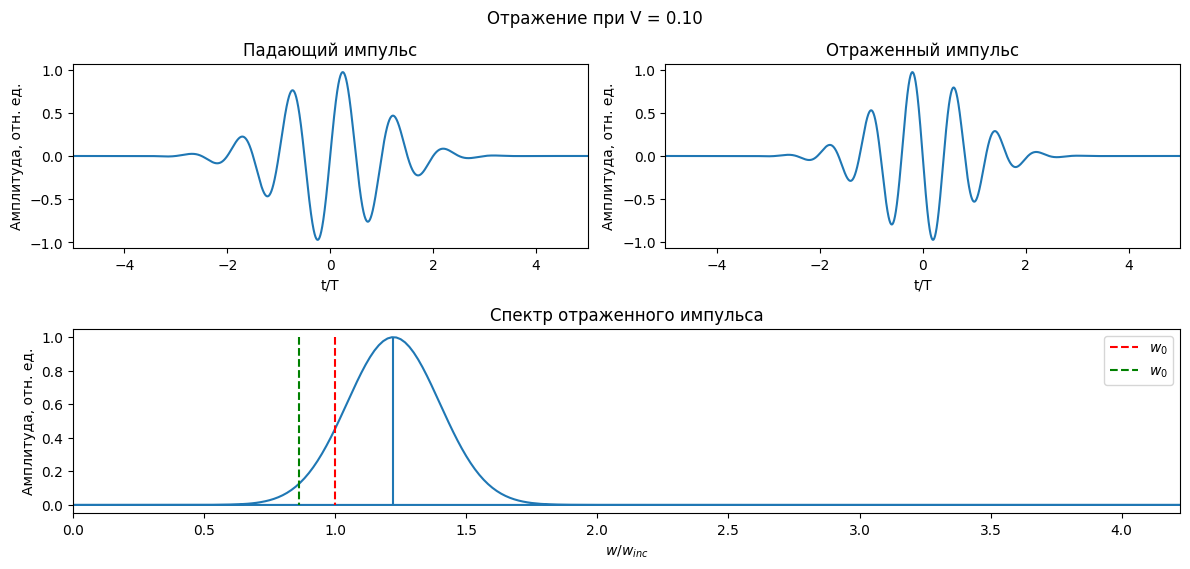

In [448]:
plt.figure(figsize=(12,8))
base_motion(envelope,t,0.1)
# plt.xlim(left=0,right=25)

6.363961030678927


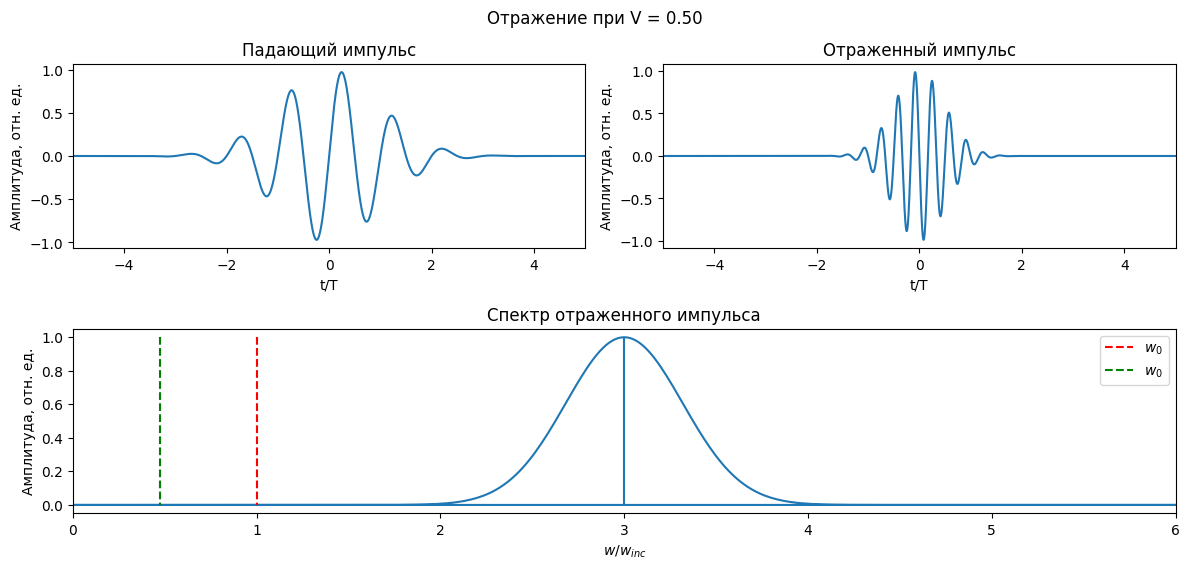

In [449]:

plt.figure(figsize=(12,8))
base_motion(envelope,t,0.5)
# plt.xlim(left=0,right=25)

114.15822353207852


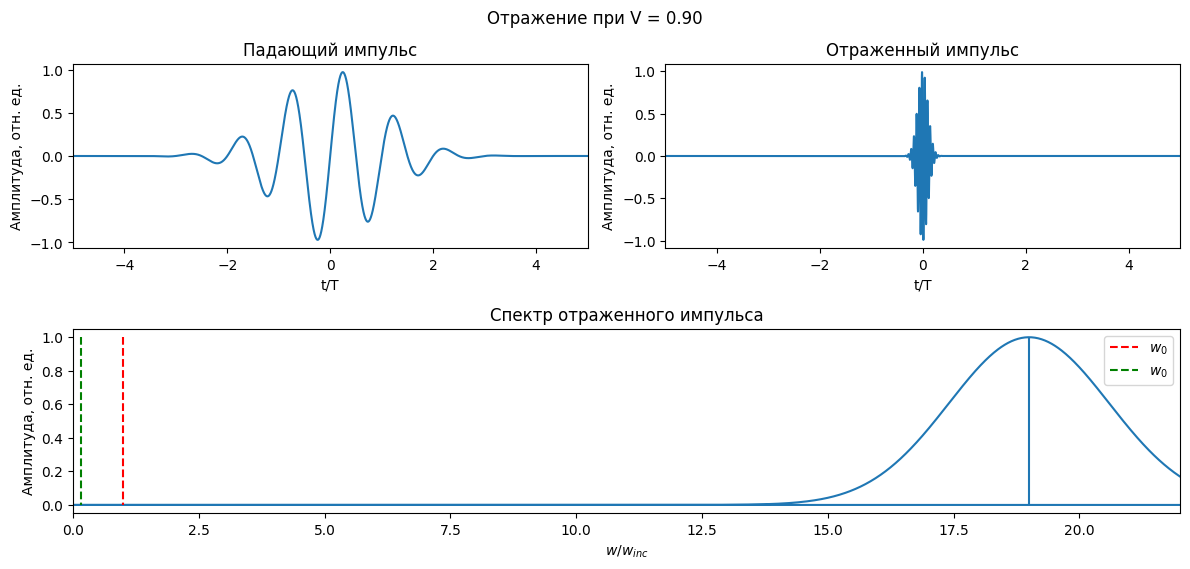

In [450]:

plt.figure(figsize=(12,8))
base_motion(envelope,t,0.9)
# plt.xlim(left=0,right=25)

In [492]:
def sin21_motion(envelope,t , velocity):

    a = envelope
    # x = a/np.sqrt(1+a**2) * np.sin(t)**2
    x = a/np.sqrt(1+a**2) * velocity * np.sin(2*t)

    reflected_field = envelope * np.sin(t+x)
    reflected_field = np.interp(t,t-x,reflected_field)

    plt.figure(1)
    # plt.suptitle(f'Отражение при V = {velocity:1.2f}')

    plt.subplot(321)
    plt.title('Падающий импульс')
    plt.plot(t/2/pi,envelope*np.sin(t))
    plt.xlim(-5,5)
    plt.xlabel('t/T')
    plt.ylabel("Амплитуда, отн. ед.")

    plt.subplot(322)
    plt.title('Отраженный импульс')
    plt.plot(t/2/pi, reflected_field)
    plt.xlim(-5,5)
    plt.xlabel('t/T')
    plt.ylabel("Амплитуда, отн. ед.")
    plt.xlim(-5,5)

    xlim_r_sp  = 50

    plt.subplot(3,1,2)
    plt.title('Спектр отраженного импульса')

    sdp = fft(reflected_field)
    sdp_freq = fftfreq(t_len, d = t[1]-t[0])
    sdp = np.abs(sdp)/np.max(np.abs(sdp))

    plt.plot(sdp_freq*2*pi, sdp)
    plt.xlabel('$w/w_{inc}$')
    plt.ylabel("Амплитуда, отн. ед.")

    try:
        sg = (1+velocity)/(1-velocity)
        plt.xlim(0,sg+5)
    except:
        plt.xlim(0,xlim_r_sp)
    # plt.vlines(sg,1,0)
    plt.vlines(1,1,0,color='r',label='Начальная частота',ls='--')
    plt.legend()

    plt.subplot(3,1,3)
    plt.semilogy(sdp_freq * 2 * pi, sdp)
    plt.xlim(0,xlim_r_sp)
    plt.xlabel('$w/w_{inc}$')
    plt.vlines(2,0,1)

    plt.tight_layout()
'''-----------------------'''
def sin22_motion(envelope,t , velocity):

    a = envelope
    x = a/np.sqrt(1+a**2) * np.sin(t)**2
    # x = velocity * np.sin(t)**2

    reflected_field = envelope * np.sin(t+x)
    td = t-x
    reflected_field = np.interp(t,td,reflected_field)

    plt.figure(1)
    # plt.suptitle(f'Отражение при V = {velocity:1.2f}')
    # plt.subtut:0

    plt.subplot(321)
    plt.title('Падающий импульс')
    # plt.plot(t/2/pi,envelope)
    plt.plot(t/2/pi,envelope*np.sin(t))
    plt.xlim(-5,5)
    plt.xlabel('t/T')
    plt.ylabel("Амплитуда, отн. ед.")

    plt.subplot(322)
    plt.title('Отраженный импульс')
    plt.plot((t)/2/pi, reflected_field)
    plt.xlim(-5,5)
    plt.xlabel('t/T')
    plt.ylabel("Амплитуда, отн. ед.")
    plt.xlim(-5,5)

    plt.subplot(3,1,2)
    plt.title('Спектр отраженного импульса')


    sdp = fft(reflected_field)
    sdp_freq = fftfreq(t_len, d = t[1]-t[0])
    sdp = np.abs(sdp)/np.max(np.abs(sdp))

    plt.plot(sdp_freq*2*pi, sdp)
    plt.xlabel('$w/w_{inc}$')
    plt.ylabel("Амплитуда, отн. ед.")


    try:
        sg = (1+velocity)/(1-velocity)
        plt.xlim(0,sg+5)
    except:
        plt.xlim(0,70)
    # plt.vlines(sg,1,0)
    plt.vlines(1,1,0,color='r',label='Начальная частота',ls='--')
    plt.legend()

    plt.subplot(3,1,3)
    plt.semilogy(sdp_freq * 2 * pi, sdp)


    w = (sdp_freq*2*pi)**(-5/2)
    plt.plot(sdp_freq*pi*2*2,w)

    # wlin = 1-(sdp_freq*2*pi)
    # plt.plot(sdp_freq*pi*2,wlin)


    plt.xlim(0,70)
    plt.vlines(2,0,1)

    plt.tight_layout()




In [495]:
plt.figure(figsize=(6,8))

# sin21_motion(envelope,t,1)

<Figure size 600x800 with 0 Axes>

<Figure size 600x800 with 0 Axes>

/tmp/ipykernel_234553/2851367182.py:114: RuntimeWarning: divide by zero encountered in power
  w = (sdp_freq*2*pi)**(-5/2)
/tmp/ipykernel_234553/2851367182.py:114: RuntimeWarning: invalid value encountered in power
  w = (sdp_freq*2*pi)**(-5/2)


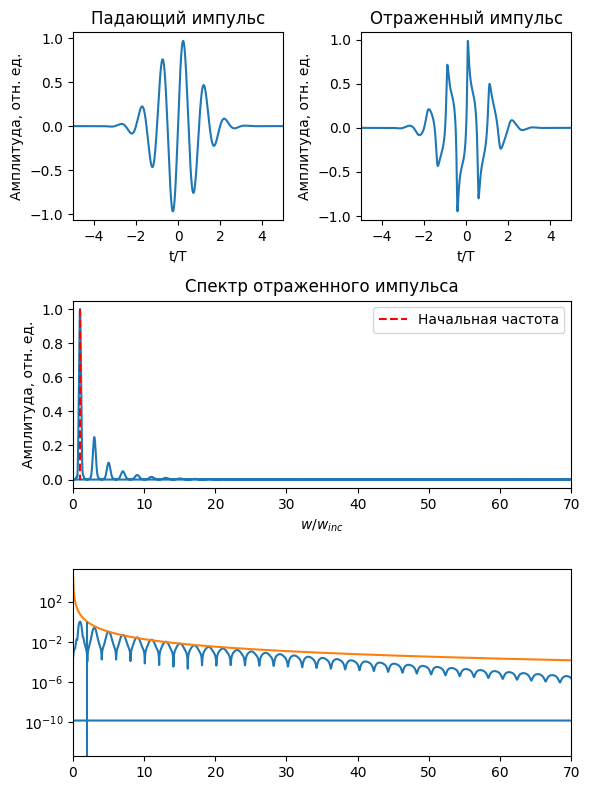

In [496]:
plt.figure(figsize=(6,8))
sin22_motion(envelope,t,1)
